In [93]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Network as edge matrix

In [ ]:
# fill in the diagonal with 1 (we know that cells can't connect to themselves so we set this to 1 to ignore it)
# this also provides a base line probability to choose each cell for a connection in the connect algorithm

# sources are defined along y axis (output)
# targets are along the x axis (input)

In [404]:
# connect
n_edges = 100
def random_connect(net, n):
    return np.random.choice(net.shape[0], n)
    
def scale_free_sample(net, n, axis):
    return np.random.choice(net.shape[0], n, p=np.sum(net, axis = axis)/np.sum(net))
        
def connect(net, sources, targets):    
    net[sources, targets] = 1
    
def connect_add(net, sources, targets, scale = 1):    
    net[sources, targets] += scale
    
def fit_loglog(x, y):
    # remove 0s (they can occur in x if something has degree of 0)
    x = np.array(x)
    y = np.array(y)
    x_zero = np.where(x == 0)[0]
    if x_zero.shape[0] > 0:
        x = np.delete(x, x_zero)
        y = np.delete(y, x_zero)
    logA = np.log(x)
    logB = np.log(y)
    m, c = np.polyfit(logA, logB, 1, w=np.sqrt(y))
    y_fit = np.exp(m*logA + c)
    return x, y_fit

def plot_net_scale(net):
    # set everything greater than 1 in the edge matrix equal to 1 to account for connect_add()
    net[net > 1] = 1
    
    output_degrees = np.sum(net, axis = 1) - 1 # minus 1 to account for the 1 added to the diagonal
    input_degrees = np.sum(net, axis = 0) - 1
    total_degrees = output_degrees + input_degrees
    
    output_degree_counts = dict(Counter(output_degrees))
    output_degree_counts = {degree:output_degree_counts[degree]/net.shape[0] for degree in output_degree_counts} 
    
    input_degree_counts = dict(Counter(input_degrees))
    input_degree_counts = {degree:input_degree_counts[degree]/net.shape[0] for degree in input_degree_counts} 
    
    total_degree_counts = dict(Counter(total_degrees))
    total_degree_counts = {degree:total_degree_counts[degree]/net.shape[0] for degree in total_degree_counts}  
    
    fig, axes = plt.subplots(1,3, figsize = (15,4))
    axes[0].scatter(output_degree_counts.keys(), output_degree_counts.values())  
    axes[0].set_xlabel('output degrees')
    axes[1].scatter(input_degree_counts.keys(), input_degree_counts.values())
    axes[1].set_xlabel('input degrees')
    axes[2].scatter(total_degree_counts.keys(), total_degree_counts.values())
    axes[2].set_xlabel('input and output degrees')
    for ax in axes:
        ax.grid()
        ax.set_yscale('log')
        ax.set_xscale('log')
    plt.show()
    
def plot_net_scale_with_LOBF(net):
    # set everything greater than 1 in the edge matrix equal to 1 to account for connect_add()
    net[net > 1] = 1
    
    output_degrees = np.sum(net, axis = 1) - 1 # minus 1 to account for the 1 added to the diagonal
    input_degrees = np.sum(net, axis = 0) - 1
    total_degrees = output_degrees + input_degrees
    
    output_degree_counts = dict(Counter(output_degrees))
    output_degree_counts = {degree:output_degree_counts[degree]/net.shape[0] for degree in output_degree_counts} 
    
    input_degree_counts = dict(Counter(input_degrees))
    input_degree_counts = {degree:input_degree_counts[degree]/net.shape[0] for degree in input_degree_counts} 
    
    total_degree_counts = dict(Counter(total_degrees))
    total_degree_counts = {degree:total_degree_counts[degree]/net.shape[0] for degree in total_degree_counts}  
    
    fig, axes = plt.subplots(1,3, figsize = (15,4))
    axes[0].scatter(output_degree_counts.keys(), output_degree_counts.values())
    axes[0].set_xlabel('output degrees')
    x, y_fit = fit_loglog(list(output_degree_counts.keys()), list(output_degree_counts.values()))
    axes[0].scatter(x, y_fit)
    
    axes[1].scatter(input_degree_counts.keys(), input_degree_counts.values())
    axes[1].set_xlabel('input degrees')
    x, y_fit = fit_loglog(list(input_degree_counts.keys()), list(input_degree_counts.values()))
    axes[1].scatter(x, y_fit)
    
    axes[2].scatter(total_degree_counts.keys(), total_degree_counts.values())
    axes[2].set_xlabel('input and output degrees')
    x, y_fit = fit_loglog(list(total_degree_counts.keys()), list(total_degree_counts.values()))
    axes[2].scatter(x, y_fit)
    
    for ax in axes:
        ax.set_yscale('log')
        ax.set_xscale('log')
    plt.show()

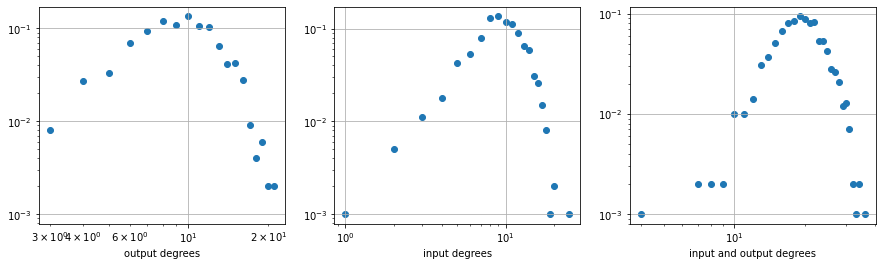

In [405]:
# network initiation
n_cells = 1000
net = np.zeros((n_cells, n_cells))

np.fill_diagonal(net, 1)

num_rounds_connection = 1000
num_connects_per_round = 10
for i in range(num_rounds_connection):
    sources = random_connect(net, num_connects_per_round)
    targets = random_connect(net, num_connects_per_round)
    connect(net, sources, targets)
    
plot_net_scale(net)

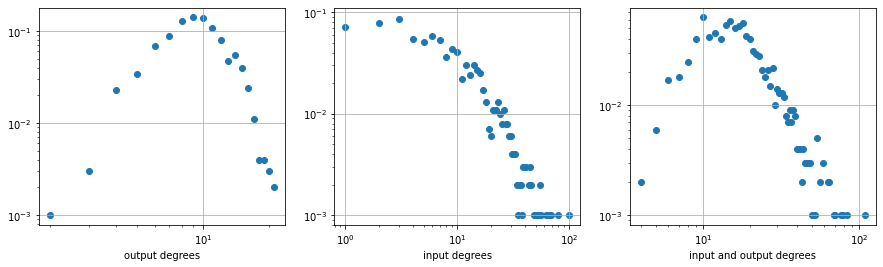

In [406]:
# network initiation
n_cells = 1000
net = np.zeros((n_cells, n_cells))

np.fill_diagonal(net, 1)

num_rounds_connection = 1000
num_connects_per_round = 10
for i in range(num_rounds_connection):
    sources = random_connect(net, num_connects_per_round)
    targets = scale_free_sample(net, num_connects_per_round, 0)
    connect_add(net, sources, targets, scale = 1)
plot_net_scale(net)

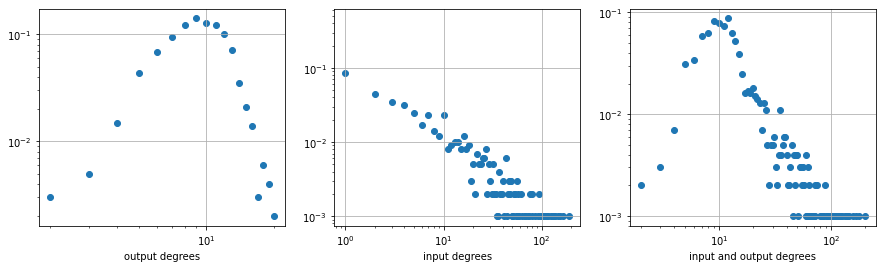

In [407]:
# network initiation
n_cells = 1000
net = np.zeros((n_cells, n_cells))

np.fill_diagonal(net, 1)

num_rounds_connection = 1000
num_connects_per_round = 10
for i in range(num_rounds_connection):
    sources = random_connect(net, num_connects_per_round)
    targets = scale_free_sample(net, num_connects_per_round, 0)
    connect_add(net, sources, targets, scale = 5)
plot_net_scale(net)

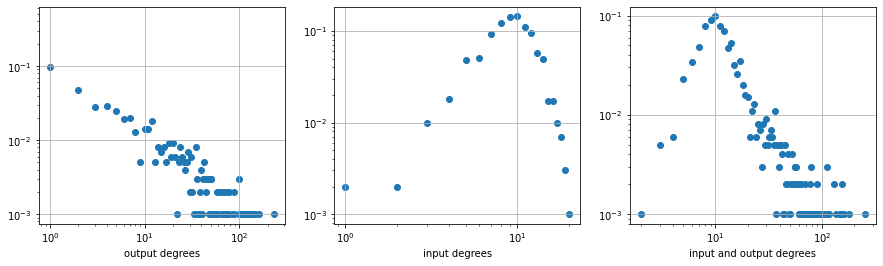

In [408]:
# network initiation
n_cells = 1000
net = np.zeros((n_cells, n_cells))

np.fill_diagonal(net, 1)

num_rounds_connection = 1000
num_connects_per_round = 10
for i in range(num_rounds_connection):
    sources = scale_free_sample(net, num_connects_per_round, 1)
    targets = random_connect(net, num_connects_per_round)
    connect_add(net, sources, targets, scale = 5)
plot_net_scale(net)

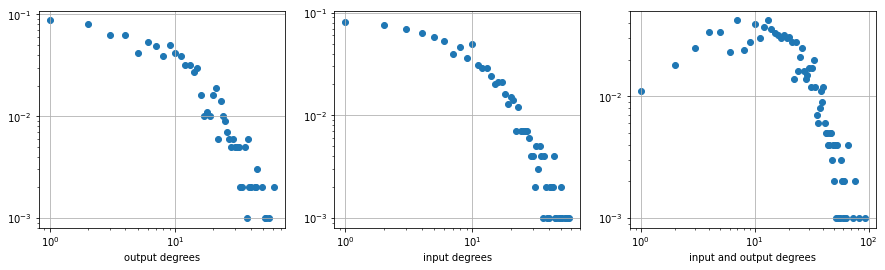

In [409]:
# network initiation
n_cells = 1000
net = np.zeros((n_cells, n_cells))

np.fill_diagonal(net, 1)

num_rounds_connection = 1000
num_connects_per_round = 10
for i in range(num_rounds_connection):
    sources = scale_free_sample(net, num_connects_per_round, 1)
    targets = scale_free_sample(net, num_connects_per_round, 0)
    connect(net, sources, targets)
plot_net_scale(net)

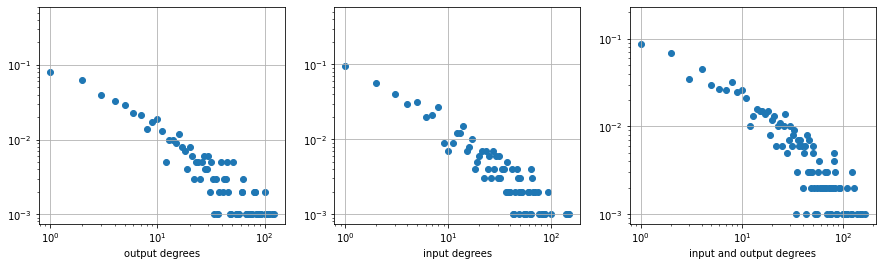

In [410]:
# network initiation
n_cells = 1000
net = np.zeros((n_cells, n_cells))

np.fill_diagonal(net, 1)

num_rounds_connection = 1000
num_connects_per_round = 10
for i in range(num_rounds_connection):
    sources = scale_free_sample(net, num_connects_per_round, 1)
    targets = scale_free_sample(net, num_connects_per_round, 0)
    connect_add(net, sources, targets, scale = 5)
plot_net_scale(net)

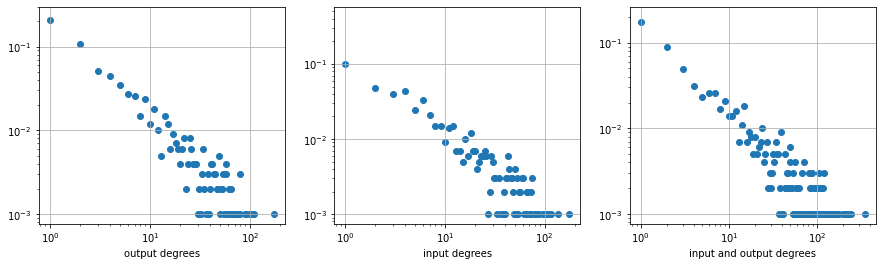

In [411]:
# network initiation
n_cells = 1000
net = np.zeros((n_cells, n_cells))

np.fill_diagonal(net, 1)

num_rounds_connection = 1000
num_connects_per_round = 10
for i in range(num_rounds_connection):
    sources = scale_free_sample(net, num_connects_per_round, 0)
    targets = scale_free_sample(net, num_connects_per_round, 0)
    connect_add(net, sources, targets, scale = 5)
plot_net_scale(net)

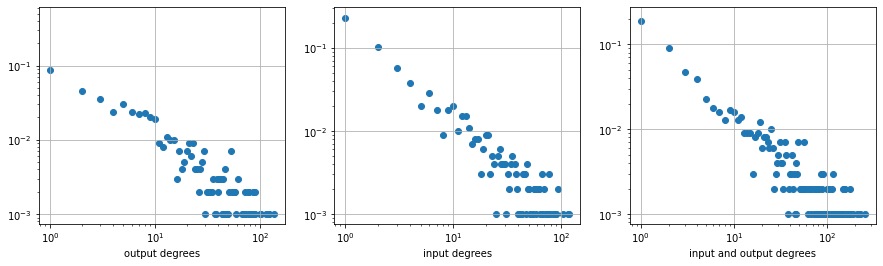

In [412]:
# network initiation
n_cells = 1000
net = np.zeros((n_cells, n_cells))

np.fill_diagonal(net, 1)

num_rounds_connection = 1000
num_connects_per_round = 10
for i in range(num_rounds_connection):
    sources = scale_free_sample(net, num_connects_per_round, 1)
    targets = scale_free_sample(net, num_connects_per_round, 1)
    connect_add(net, sources, targets, scale = 5)
plot_net_scale(net)

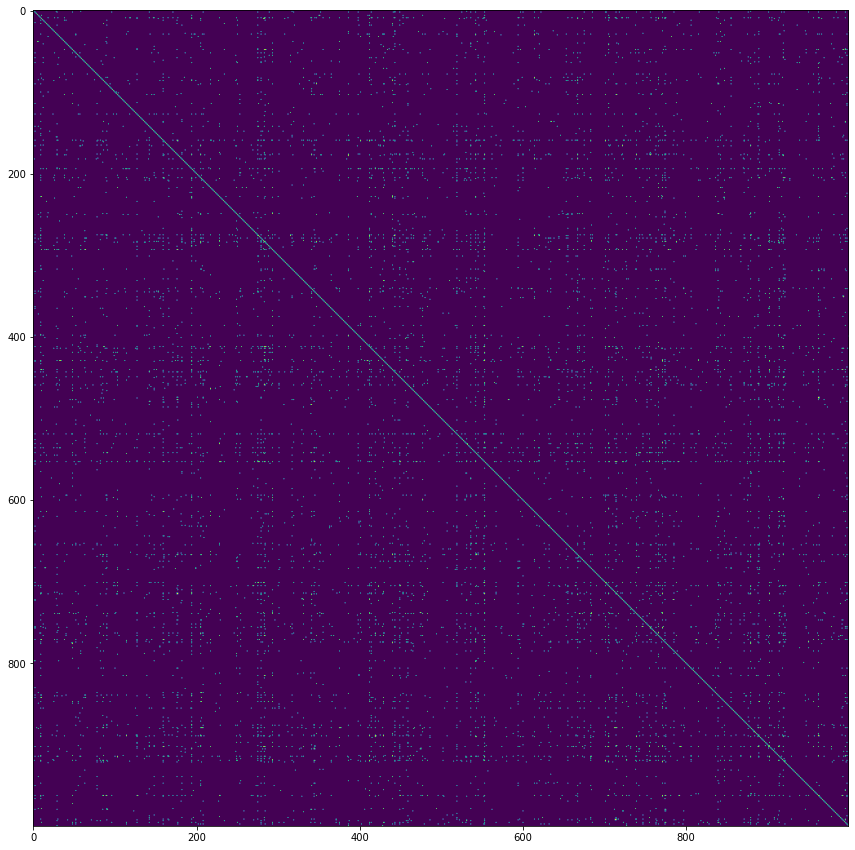

In [413]:
plt.figure(figsize = (15,15))
plt.imshow(net)
plt.show()